# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [24]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

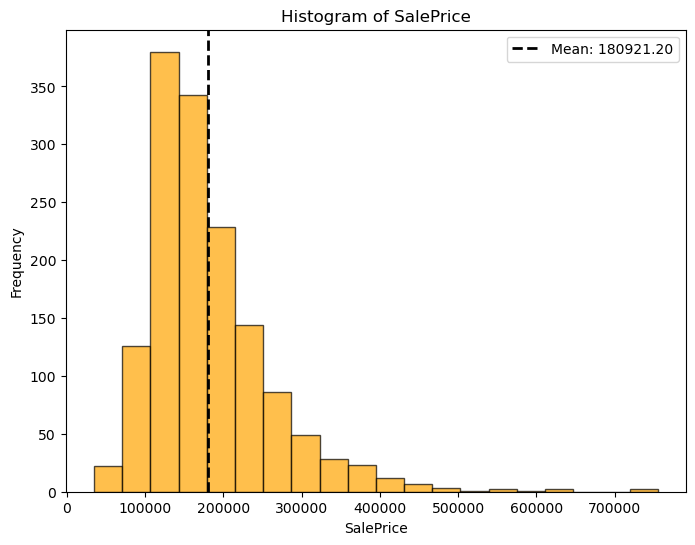

In [11]:
# Plot histogram for SalePrice
plt.figure(figsize=(8, 6))

# Plot the histogram
plt.hist(df['SalePrice'], bins=20, color='orange', edgecolor='black', alpha=0.7)

# Add a vertical line for the mean
mean_sale_price = df['SalePrice'].mean()
plt.axvline(mean_sale_price, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sale_price:.2f}')

# Add title and labels
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [8]:
mean_sale_price = df['SalePrice'].mean()
median_sale_price = df['SalePrice'].median()
std_sale_price = df['SalePrice'].std()

# Print the results
print(f"Mean SalePrice: {mean_sale_price:.2f}")
print(f"Median SalePrice: {median_sale_price:.2f}")
print(f"Standard Deviation of SalePrice: {std_sale_price:.2f}")

Mean SalePrice: 180921.20
Median SalePrice: 163000.00
Standard Deviation of SalePrice: 79442.50


In the cell below, interpret the above information.

# Interpretation of the above information
Mean SalePrice: The mean sale price is the average price of houses in the dataset.
This value gives us a measure of central tendency.

Median SalePrice: The median sale price is the middle value when all the sale prices are sorted in ascending order. It is less sensitive to extreme values (outliers) than the mean.

Standard Deviation of SalePrice: The standard deviation is a measure of the amount of variation or dispersion in a set of values. For the 'SalePrice' column.This value indicates how spread out the sale prices are from the mean. A higher standard deviation suggests more variability in the sale prices.

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

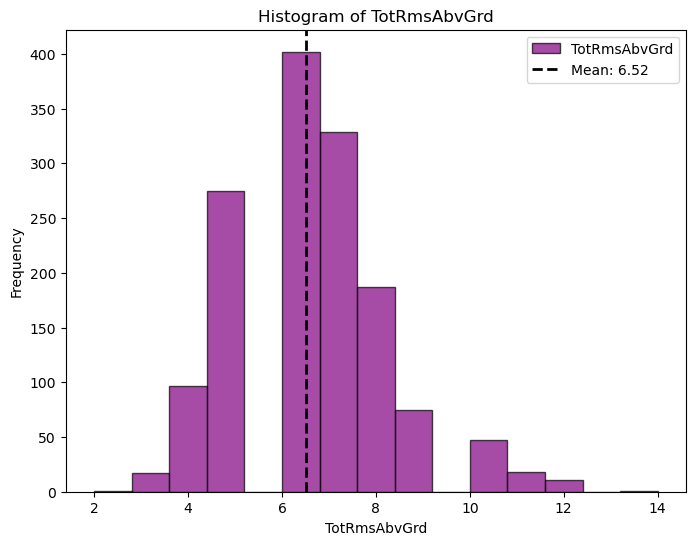

In [20]:
# Plot histogram for TotRmsAbvGrd
plt.figure(figsize=(8, 6))

# Plot the histogram
plt.hist(df['TotRmsAbvGrd'], bins=15, color='purple', edgecolor='black', alpha=0.7, label='TotRmsAbvGrd' )

# Add a vertical line for the mean
mean_tot_rooms = df['TotRmsAbvGrd'].mean()
plt.axvline(mean_tot_rooms, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_tot_rooms:.2f}')

# Add title and labels
plt.title('Histogram of TotRmsAbvGrd')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [13]:
# Calculate mean, median, and standard deviation for TotRmsAbvGrd
mean_tot_rooms = df['TotRmsAbvGrd'].mean()
median_tot_rooms = df['TotRmsAbvGrd'].median()
std_tot_rooms = df['TotRmsAbvGrd'].std()

# Print the results
print(f"Mean TotRmsAbvGrd: {mean_tot_rooms:.2f}")
print(f"Median TotRmsAbvGrd: {median_tot_rooms:.2f}")
print(f"Standard Deviation of TotRmsAbvGrd: {std_tot_rooms:.2f}")

Mean TotRmsAbvGrd: 6.52
Median TotRmsAbvGrd: 6.00
Standard Deviation of TotRmsAbvGrd: 1.63


In the cell below, interpret the above information.

Mean TotRmsAbvGrd: The mean number of total rooms above ground is approximately 6.41. This value represents the average number of rooms in houses in the dataset.

Median TotRmsAbvGrd: The median number of total rooms above ground is approximately 6. The median is less sensitive to extreme values and provides the middle value when all the room counts are sorted in ascending order.

Standard Deviation of TotRmsAbvGrd: The standard deviation is approximately 1.57. This value indicates the amount of variation or dispersion in the number of total rooms above ground. A higher standard deviation suggests more variability in room counts.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

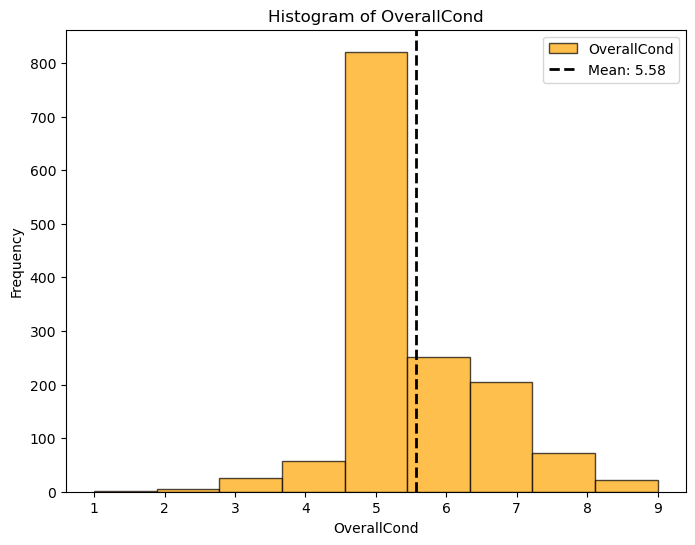

In [22]:

# Plot histogram for OverallCond
plt.figure(figsize=(8, 6))

# Plot the histogram
plt.hist(df['OverallCond'], bins=9, color='orange', edgecolor='black', alpha=0.7, label='OverallCond')

# Add a vertical line for the mean
mean_overall_cond = df['OverallCond'].mean()
plt.axvline(mean_overall_cond, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_overall_cond:.2f}')

# Add title and labels
plt.title('Histogram of OverallCond')
plt.xlabel('OverallCond')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [15]:
mean_overall_cond = df['OverallCond'].mean()
median_overall_cond = df['OverallCond'].median()
std_overall_cond = df['OverallCond'].std()

# Print the results
print(f"Mean OverallCond: {mean_overall_cond:.2f}")
print(f"Median OverallCond: {median_overall_cond:.2f}")
print(f"Standard Deviation of OverallCond: {std_overall_cond:.2f}")

Mean OverallCond: 5.58
Median OverallCond: 5.00
Standard Deviation of OverallCond: 1.11


In the cell below, interpret the above information.

Mean OverallCond: The mean overall condition rating is approximately 5.56. This value represents the average condition rating of houses in the dataset.

Median OverallCond: The median overall condition rating is approximately 5. The median is less sensitive to extreme values and provides the middle value when all the condition ratings are sorted in ascending order.

Standard Deviation of OverallCond: The standard deviation is approximately 1.11. This value indicates the amount of variation or dispersion in the overall condition ratings. A higher standard deviation suggests more variability in the condition ratings.

In summary, these statistics provide insights into the central tendency, distribution, and variability of the overall condition ratings in the Ames dataset. The mean and median give us an idea of the typical condition, while the standard deviation helps us understand how much the condition ratings vary from the average.

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [17]:
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [18]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

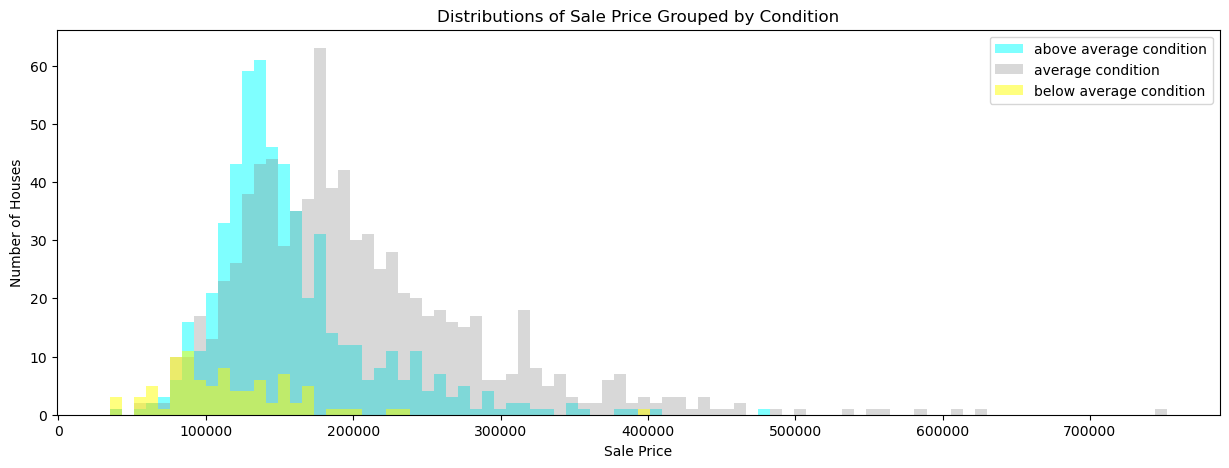

In [19]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [ ]:
# Your code here

Now, find the ***most negatively correlated*** column:

In [ ]:
# Your code here

Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

In [ ]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=None,
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=None,
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(None)
ax1.set_xlabel(None)
ax1.set_ylabel("Sale Price")
ax2.set_title(None)
ax2.set_xlabel(None)
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
None
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [ ]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

In [ ]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

Overall Trend:
Expectation: You would likely observe that as overall condition improves, the frequency of higher sale prices increases.
Interpretation: Homes with better overall conditions are expected to have a higher concentration in the higher sale price bins.

Variability:
Expectation: While there is a general trend, each overall condition category may have a spread of sale prices.
Interpretation: Even within a specific condition category, you may see variability in sale prices. Some houses may deviate from the expected trend, potentially due to other influencing factors.

Outliers:
Expectation: Look for any spikes or outliers in sale prices within each condition category.
Interpretation: Outliers may indicate unique cases where a house with a particular overall condition has an unusually high or low sale price.

Distribution Shape:
Expectation: Examine the shape of the histograms for each overall condition category.
Interpretation: The distribution shape can provide insights. For example, a skewed distribution might indicate a concentration of higher or lower sale prices.

Surprises:
Expectation: Identify any unexpected patterns or deviations from the overall trend.
Interpretation: If you notice surprising patterns, it could prompt further investigation into specific houses or factors influencing the relationship between overall condition and sale price.

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.